In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
d1 = pd.read_csv('titanic.csv')

In [ ]:
# Afficher les premières lignes du dataframe
print(d1.head())

# Informations sur les données
print(d1.info())

# Statistiques descriptives
print(d1.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Identifier les données manquantes
print(d1.isnull().sum())

# Remplacer les valeurs manquantes
#data['Age'].fillna(data['Age'].median(), inplace=True)
#data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
#data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
d1['Age'].fillna(d1['Age'].median(), inplace=True)
print(d1.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
d1 = d1.drop('Ticket', axis=1)
d1 = d1.drop('Cabin', axis=1)
d1 = d1.drop('Name', axis=1)
d1 = d1.drop('', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Créer un objet Scaler
scaler = StandardScaler()

# Appliquer le scaling aux caractéristiques numériques
d1[['Age', 'Fare']] = scaler.fit_transform(d1[['Age', 'Fare']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(d1.drop('Survived', axis=1), d1['Survived'], test_size=0.2, random_state=42)

# Initialiser le modèle
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Mesures de performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle
rf = RandomForestClassifier()

# Entraîner le modèle
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)

# Mesures de performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



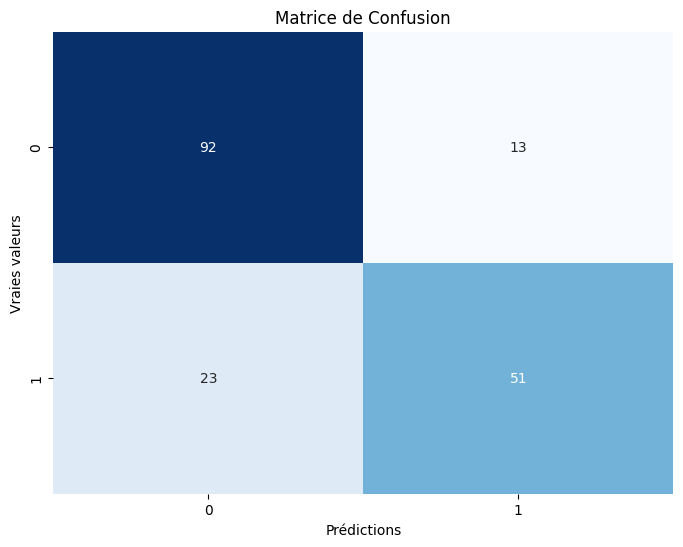

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

In [ ]:
from xgboost import XGBClassifier

# Initialiser le modèle
xgb = XGBClassifier()

# Entraîner le modèle
xgb.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb.predict(X_test)

# Mesures de performance
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



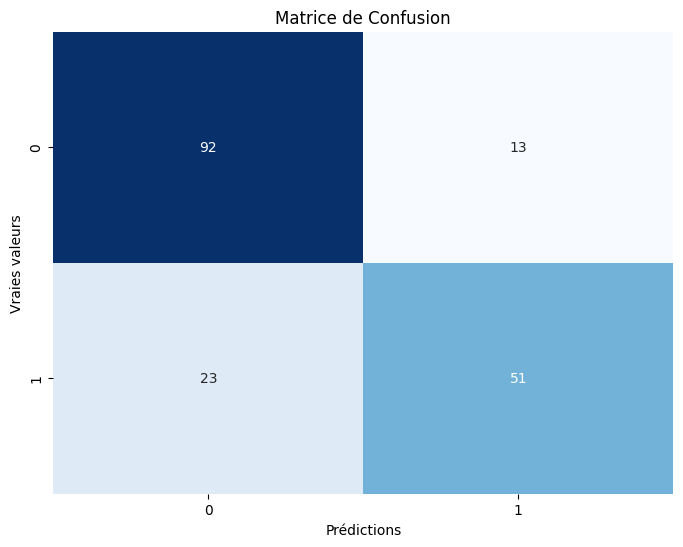

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

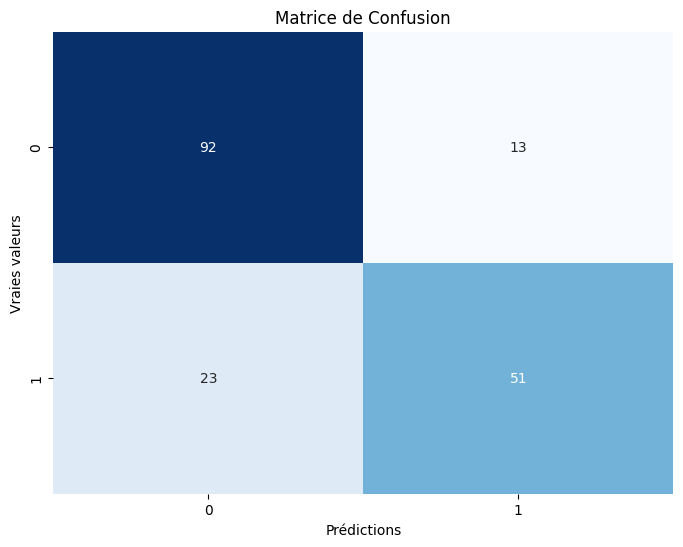

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.show()

In [ ]:
# Comparaison des modèles
results = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'Forêt Aléatoire', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]
})

# Afficher le tableau comparatif
print(results)

                  Modèle  Accuracy
0  Régression Logistique  0.798883
1        Forêt Aléatoire  0.832402
2                XGBoost  0.798883


Alors le model le plus performant est Random forest